# Problem Definition
# Objective: Predict the likelihood of a company's bankruptcy using financial indicators.
# Goal: Develop a machine learning model to classify companies as bankrupt (1) or not bankrupt (0).


# Data Understanding & Preprocessing

In [ ]:
# Import the Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows & all the columns
pd.set_option('display.max_columns', None)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [ ]:
# Display the last few rows & all the columns
pd.set_option('display.max_columns', None)
df.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,0.175045,0.175045,0.175045,0.216602,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.380155,0.010451,0.005457,0.631415,0.006655,0.124618,0.875382,0.005150,0.373823,0.005366,0.098222,0.171111,0.404804,0.103448,0.000690,0.009177,4.030000e+07,0.000143,0.027903,0.006348,0.392596,0.006312,0.817769,0.312840,0.578455,0.099481,0.005469,0.005072,0.103838,0.346224,0.277543,0.013212,0.786888,0.736716,0.330914,1.792237e-03,0.925611,0.002266,0.019060,0.000229,0.000124,0.593985,1.077940e-04,0.671570,0.400338,0.786888,0.330914,0.112622,0.639806,0.458639,0.587178,0.314063,0.027951,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,0.181324,0.181324,0.181324,0.216697,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09,0.000445,0.264730,0.377389,0.009259,0.006741,0.631489,0.004623,0.099253,0.900747,0.006772,0.372505,0.008619,0.098572,0.171805,0.399926,0.103448,0.000655,0.009652,9.940000e+0

In [ ]:
# Display the shape of the DataFrame
df.shape

(6819, 96)

In [ ]:
# Get information about columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
# Descriptive Statistics:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [ ]:
# Categorize Features

binary_features = ['Bankrupt?', ' Liability-Assets Flag']
numeric_features = [col for col in df.select_dtypes(include=np.number).columns if col not in binary_features]
categorical_features = df.select_dtypes(include=['object']).columns

print("Numeric Features:", list(numeric_features))
print("Categorical Features:", list(categorical_features))
print("Binary Features:", list(binary_features))

Numeric Features: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Gr

In [ ]:
# Check for  inconsistent data
# Find columns with only one unique value
columns_with_unique_value = [col for col in df.columns if df[col].nunique() == 1]

# Drop the identified columns
df = df.drop(columns=columns_with_unique_value)

print("Dropped columns:", columns_with_unique_value)

Dropped columns: [' Net Income Flag']


# Missing values

In [ ]:
# Check for missing data in each column
missing_data = df.isnull().sum()
# Display columns with missing values
missing_data = missing_data[missing_data > 0]
print("\nMissing Data (if any):\n", missing_data)



Missing Data (if any):
 Series([], dtype: int64)


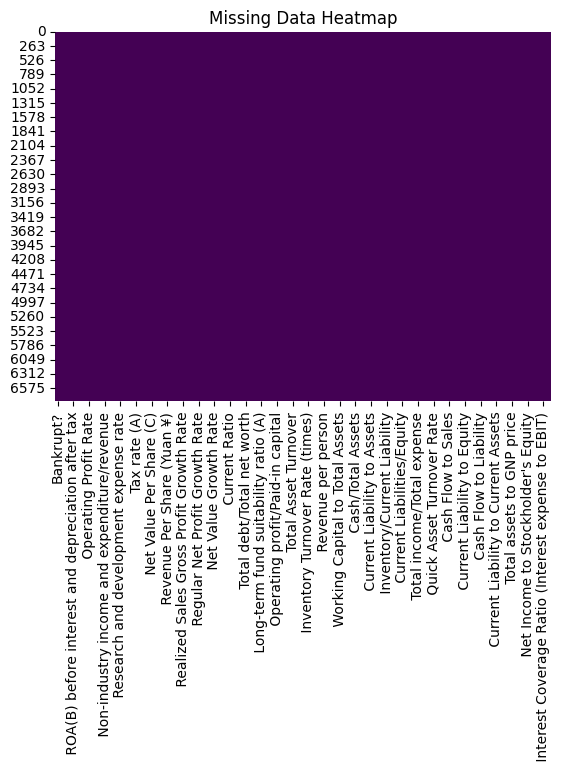

In [ ]:
# Create a heatmap to visualize missing data & confirm visually that there are no missing values in the dataset

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

While the dataset initially appeared to have no missing values, some zeros were identified as potential placeholders for missing data. Binary columns (0 and 1) were excluded from this analysis, as their zeros are valid. Domain knowledge was used to pinpoint columns where zeros were likely erroneous and required correction.

In [ ]:
# Get the unique values ​​for each column of type int 64
liability_assets_flag_unique = df[' Liability-Assets Flag'].unique()
bankrupt_unique = df['Bankrupt?'].unique()

# Show unique values
print("Unique values ​​of Liability-Assets Flag :", liability_assets_flag_unique)
print("Unique values ​​of Bankrupt?':", bankrupt_unique)

Unique values ​​of Liability-Assets Flag : [0 1]
Unique values ​​of Bankrupt?': [1 0]


In [ ]:
total_zeros = (df == 0).sum().sum()
print("Total number of 0 values ​​in the DataFrame :", total_zeros)

Total number of 0 values ​​in the DataFrame : 21215


In [ ]:
# Create a dictionary to store the zero counts for each column
zero_counts = {}

# Iterate through columns and count zeros
for column in df.columns:
    zero_counts[column] = (df[column] == 0).sum()

# Display the columns with zero counts
for column, count in zero_counts.items():
    if count > 0:
        print(f"Column '{column}' has {count} zeros.")


Column 'Bankrupt?' has 6599 zeros.
Column ' ROA(C) before interest and depreciation before interest' has 1 zeros.
Column ' ROA(A) before interest and % after tax' has 1 zeros.
Column ' ROA(B) before interest and depreciation after tax' has 1 zeros.
Column ' Operating Gross Margin' has 1 zeros.
Column ' Realized Sales Gross Margin' has 1 zeros.
Column ' Operating Profit Rate' has 1 zeros.
Column ' Pre-tax net Interest Rate' has 1 zeros.
Column ' After-tax net Interest Rate' has 1 zeros.
Column ' Non-industry income and expenditure/revenue' has 1 zeros.
Column ' Continuous interest rate (after tax)' has 1 zeros.
Column ' Operating Expense Rate' has 1 zeros.
Column ' Research and development expense rate' has 1424 zeros.
Column ' Cash flow rate' has 1 zeros.
Column ' Interest-bearing debt interest rate' has 891 zeros.
Column ' Tax rate (A)' has 2568 zeros.
Column ' Net Value Per Share (B)' has 1 zeros.
Column ' Net Value Per Share (A)' has 1 zeros.
Column ' Net Value Per Share (C)' has 1 

In [ ]:
# List of columns to convert
columns_to_nan = [
    ' Operating Expense Rate',
    ' Net Value Per Share (B)',
    ' Net Value Per Share (A)',
    ' Net Value Per Share (C)',
    ' Current Assets/Total Assets'
]

# Replace values ​​of 0 with NaN in the specified columns
df[columns_to_nan] = df[columns_to_nan].replace(0, np.nan)

# Check the conversion result
missing_data = df[columns_to_nan].isnull().sum()
print("Nombre de valeurs manquantes par colonne après conversion :")
print(missing_data)

Nombre de valeurs manquantes par colonne après conversion :
Operating Expense Rate         1
Net Value Per Share (B)        1
Net Value Per Share (A)        1
Net Value Per Share (C)        1
Current Assets/Total Assets    1
dtype: int64


In [ ]:
# Replace NaNs with the median of each numeric column
df[columns_to_nan] = df[columns_to_nan].fillna(df[columns_to_nan].median())

# Verify that there are no more missing values in these columns
print(df[columns_to_nan].isnull().sum())

Operating Expense Rate         0
Net Value Per Share (B)        0
Net Value Per Share (A)        0
Net Value Per Share (C)        0
Current Assets/Total Assets    0
dtype: int64


In [ ]:
# Verify that there are no more missing values in all data
print(df.isnull().sum().T)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Net Income to Stockholder's Equity                         0
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Length: 95, dtype: int64


# Outliers

In [ ]:
# Update features
binary_features = ['Bankrupt?', ' Liability-Assets Flag']
numeric_features = [col for col in df.select_dtypes(include=np.number).columns if col not in binary_features]

In [ ]:
# Identify Unscaled Features (not in the range of 0 to 1)
scaled_features= [col for col in df[numeric_features] if df[col].between(0, 1).all()]
unscaled_features = [col for col in df[numeric_features]  if col not in scaled_features]

print("scaled_features :", scaled_features)
print("unscaled_features :", unscaled_features)


scaled_features : [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Interest Expense Ratio', ' Debt ratio %', ' Net worth/Assets'

In [ ]:
from scipy.stats import zscore

# Dictionary to store outliers by column (unscaled_features)
outliers_unscaled_dict = {}

# Calculating Z-Scores for Unscaled Columns
z_scores_unscaled = df[unscaled_features].apply(zscore)

# Identification of outliers (Z-Score > 3 or < -3)
outliers_unscaled = (z_scores_unscaled.abs() > 3)

# Loop through each unscaled column to extract outliers
for col in unscaled_features:
    outlier_indices = df[outliers_unscaled[col]].index
    outliers_unscaled_dict[col] = df.loc[outlier_indices, col].tolist()

# Show outliers for each unscaled column
for col, outliers in outliers_unscaled_dict.items():
    print(f"Colonne : {col}")
    print(f"Outliers : {outliers}\n")


Colonne :  Operating Expense Rate
Outliers : []

Colonne :  Research and development expense rate
Outliers : [9750000000.0, 9850000000.0, 9800000000.0, 9980000000.0, 9930000000.0, 9980000000.0, 9780000000.0, 9980000000.0, 9860000000.0, 9800000000.0, 9800000000.0, 9830000000.0, 9750000000.0, 9900000000.0, 9810000000.0, 9860000000.0, 9860000000.0, 9850000000.0, 9800000000.0, 9980000000.0, 9920000000.0, 9880000000.0, 9920000000.0, 9930000000.0, 9860000000.0, 9750000000.0, 9980000000.0, 9920000000.0, 9850000000.0, 9810000000.0, 9850000000.0, 9900000000.0, 9980000000.0, 9830000000.0, 9930000000.0]

Colonne :  Interest-bearing debt interest rate
Outliers : [980000000.0, 710000000.0, 490000000.0, 990000000.0, 440000000.0, 950000000.0, 980000000.0, 690000000.0, 480000000.0, 970000000.0, 530000000.0, 520000000.0, 710000000.0, 990000000.0, 620000000.0, 730000000.0, 990000000.0, 670000000.0, 840000000.0, 410000000.0, 570000000.0, 750000000.0, 540000000.0, 850000000.0, 840000000.0, 860000000.0, 91

<ipython-input-20-e8bfb4669dcd>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=6)  # Further reduce legend font size
<ipython-input-20-e8bfb4669dcd>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=6)  # Further reduce legend font size
<ipython-input-20-e8bfb4669dcd>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=6)  # Further reduce legend font size
<ipython-input-20-e8bfb4669dcd>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

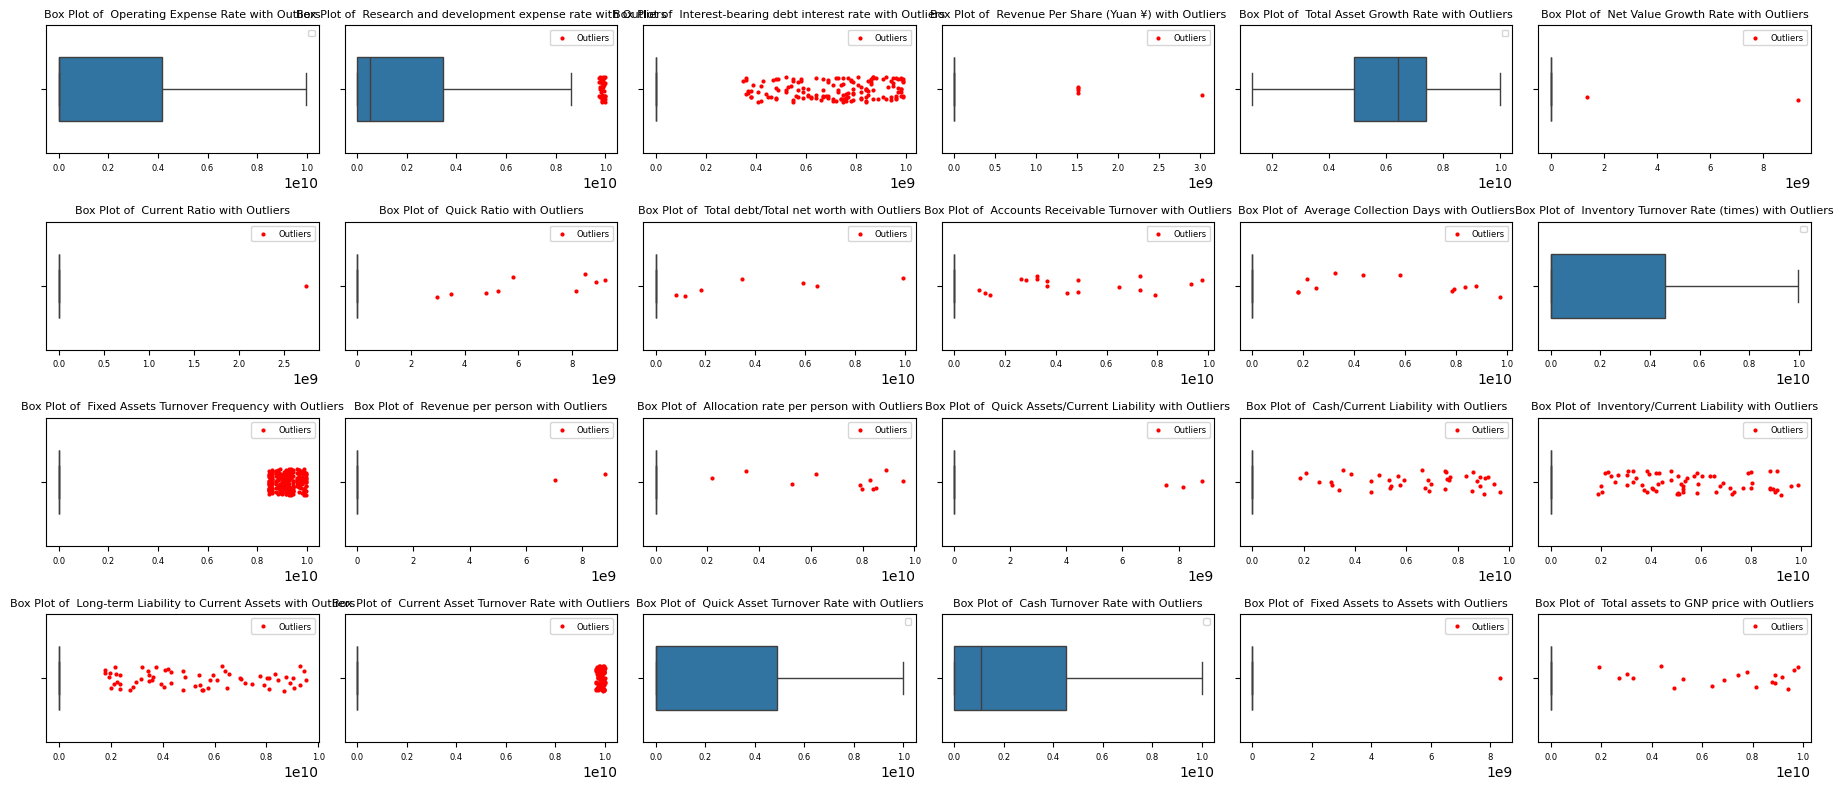

In [ ]:
# Visualizing outliers using box plots for unscaled features.

num_plots = len(unscaled_features)  # Get the total number of plots
num_cols = 6  # Increased number of columns for the plots (try different values)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

# Reduce figure size, especially the height
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 2 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(unscaled_features):
    ax = axes[i]  # Get the current subplot

    # Extract outliers for the current column
    outliers = outliers_unscaled_dict[col]

    # Create box plot with all the data for the current column
    sns.boxplot(x=df[col], showfliers=False, ax=ax, width=0.5)  # Reduce width

    # Overlay the outliers with a different color/marker
    sns.stripplot(x=outliers, color='red', marker='o', size=3, label='Outliers', ax=ax)  # Reduce size

    ax.set_title(f'Box Plot of {col} with Outliers', fontsize=8)  # Further reduce title font size
    ax.legend(fontsize=6)  # Further reduce legend font size

    # Remove x and y axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Reduce tick label size
    ax.tick_params(axis='both', labelsize=6)

# Hide any unused subplots
for j in range(num_plots, num_rows * num_cols):
    axes[j].set_visible(False)

plt.tight_layout()  # Adjust spacing

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.0123

# Feature Engineering:

In [ ]:
# ---Standardize or normalize numerical features---

# Identify features already in the range of 0 to 1

unscaled_features = [
    col for col in numeric_features
    if not (df[col].between(0, 1, inclusive="both").all())  # Check if all values are between 0 and 1
]

# 2. Scale Unscaled Features (using StandardScaler)
scaler = StandardScaler()
df[unscaled_features] = scaler.fit_transform(df[unscaled_features])



In [ ]:
# correlation matrix
# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(30, 24)) # Increase figure size significantly
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Remove highly correlated features to avoid multicollinearity.

# Set a correlation threshold
correlation_threshold = 0.8  # Adjust as needed
# Calculate the correlation matrix
correlation_matrix = df.corr().abs()
# Get the upper triangle of the correlation matrix (to avoid redundancy)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlations above the threshold
to_drop = [
    column
    for column in upper_triangle.columns
    if any(upper_triangle[column] > correlation_threshold)]

# Drop the highly correlated features
df_cleaned = df.drop(columns=to_drop)

# Print the dropped columns and the shape of the reduced DataFrame
print("Dropped Columns:", to_drop)
print("Shape of Reduced DataFrame:", df_cleaned.shape)


Dropped Columns: [' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Current Liability to Assets', ' Operating Funds to Liability', ' Current Liabilities/Equity', ' Cash Flow to Sales', ' Current Liability to Liability', ' Current Liability to Equity', ' Equity to Long-term Liability', ' Net Income to Total Assets', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Liability to Equity']
Shape of Reduced DataFrame: (6819, 70)


In [ ]:
# correlation matrix
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(30, 24)) # Increase figure size significantly
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Update the numeric_features and categorical_features variables
binary_features = ['Bankrupt?', ' Liability-Assets Flag']
numeric_features = [col for col in df_cleaned.select_dtypes(include=np.number).columns if col not in binary_features]
categorical_features = df_cleaned.select_dtypes(include=['object']).columns


print("Binary Features:", list(binary_features))
print("Numeric Features (Updated):", list(numeric_features))
print("Categorical Features (Updated):", list(categorical_features))

Binary Features: ['Bankrupt?', ' Liability-Assets Flag']
Numeric Features (Updated): [' ROA(C) before interest and depreciation before interest', ' Operating Gross Margin', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth'

In [ ]:
df_cleaned.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,-0.616334,-0.750713,0.458143,-0.151921,0.0,0.147950,0.169141,0.311664,-0.025697,0.022102,0.848195,0.688979,0.217535,-0.182259,-0.013721,0.263100,0.363725,-0.012111,-0.034237,0.629951,-0.026226,0.207576,0.005024,0.390284,0.006479,0.398036,0.086957,-0.045967,-0.038333,-0.661726,-0.407123,0.032903,-0.017024,0.392913,-0.038222,0.672775,0.166673,0.190643,0.004094,-0.020937,-0.072818,0.276920,-0.095887,0.676269,0.721275,-0.094979,0.903225,0.002022,0.064856,-0.175421,1.299751,0.593831,-0.685397,-0.012111,0.637555,0.458609,0.520382,0.312905,0.118250,0,-0.049491,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,-0.616334,-0.750713,0.461867,-0.151921,0.0,0.182251,0.208944,0.318137,-0.025697,0.022080,0.848088,0.689693,0.217620,0.207732,-0.013721,0.264516,0.376709,-0.012111,-0.034237,0.635172,-0.026226,0.171176,0.005059,0.376760,0.005835,0.397725,0.064468,-0.045967,-0.038333,2.220288,-0.116896,0.025484,-0.017024,0.391590,-0.038222,0.751111,0.127236,0.182419,0.014948,-0.020937,-0.072818,0.289642,-0.095887,0.308589,0.731975,-0.094979,0.931065,0.002226,0.025516,-0.423919,1.640522,0.593916,0.006134,-0.012111,0.641100,0.459001,0.567101,0.314163,0.047775,0,-0.049491,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,-0.616334,-0.740898,0.458521,-0.151921,0.0,0.177911,0.180581,0.307102,-0.025697,0.022760,0.848094,0.689463,0.217601,0.611527,-0.013721,0.264184,0.368913,-0.012111,-0.034237,0.629631,-0.026226,0.207516,0.005100,0.379093,0.006562,0.406580,0.014993,-0.045967,-0.038333,-0.641712,0.662558,0.013387,-0.017024,0.381968,-0.038222,0.829502,0.340201,0.602806,0.000991,-0.020937,10.391338,0.277456,-0.095887,0.446027,0.742729,-0.094979,0.909903,0.002060,0.021387,-0.423919,-0.641164,0.594502,-0.582280,-0.012111,0.642765,0.459254,0.538491,0.314515,0.025346,0,-0.049491,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,-0.616334,-0.750713,0.465705,-0.151921,0.0,0.154187,0.193722,0.321674,-0.025697,0.022046,0.848005,0.689110,0.217568,-0.216772,-0.013721,0.263371,0.384077

In [ ]:
df_cleaned.shape

(6819, 70)

In [ ]:
# Encoding:
# We are skipping the encoding step here because all features are already numeric
# (float64 or int64). The binary features with values 0 and 1
# can be directly used by Machine Learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_cleaned.drop(columns=['Bankrupt?'])
y = df_cleaned['Bankrupt?']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (5455, 69) (5455,)
Testing set shape: (1364, 69) (1364,)


# Exploratory Data Analysis (EDA)

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


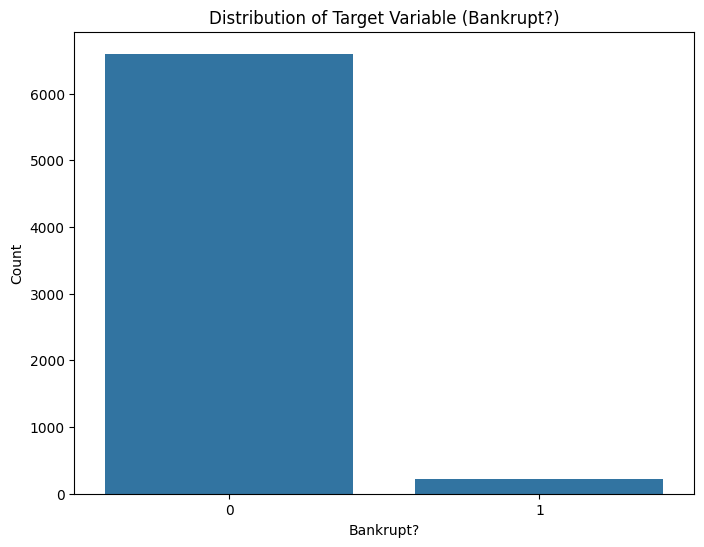

In [ ]:
# Analyze target variable distribution
print(df_cleaned['Bankrupt?'].value_counts())

# Visualize target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankrupt?', data=df_cleaned)
plt.title('Distribution of Target Variable (Bankrupt?)')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()

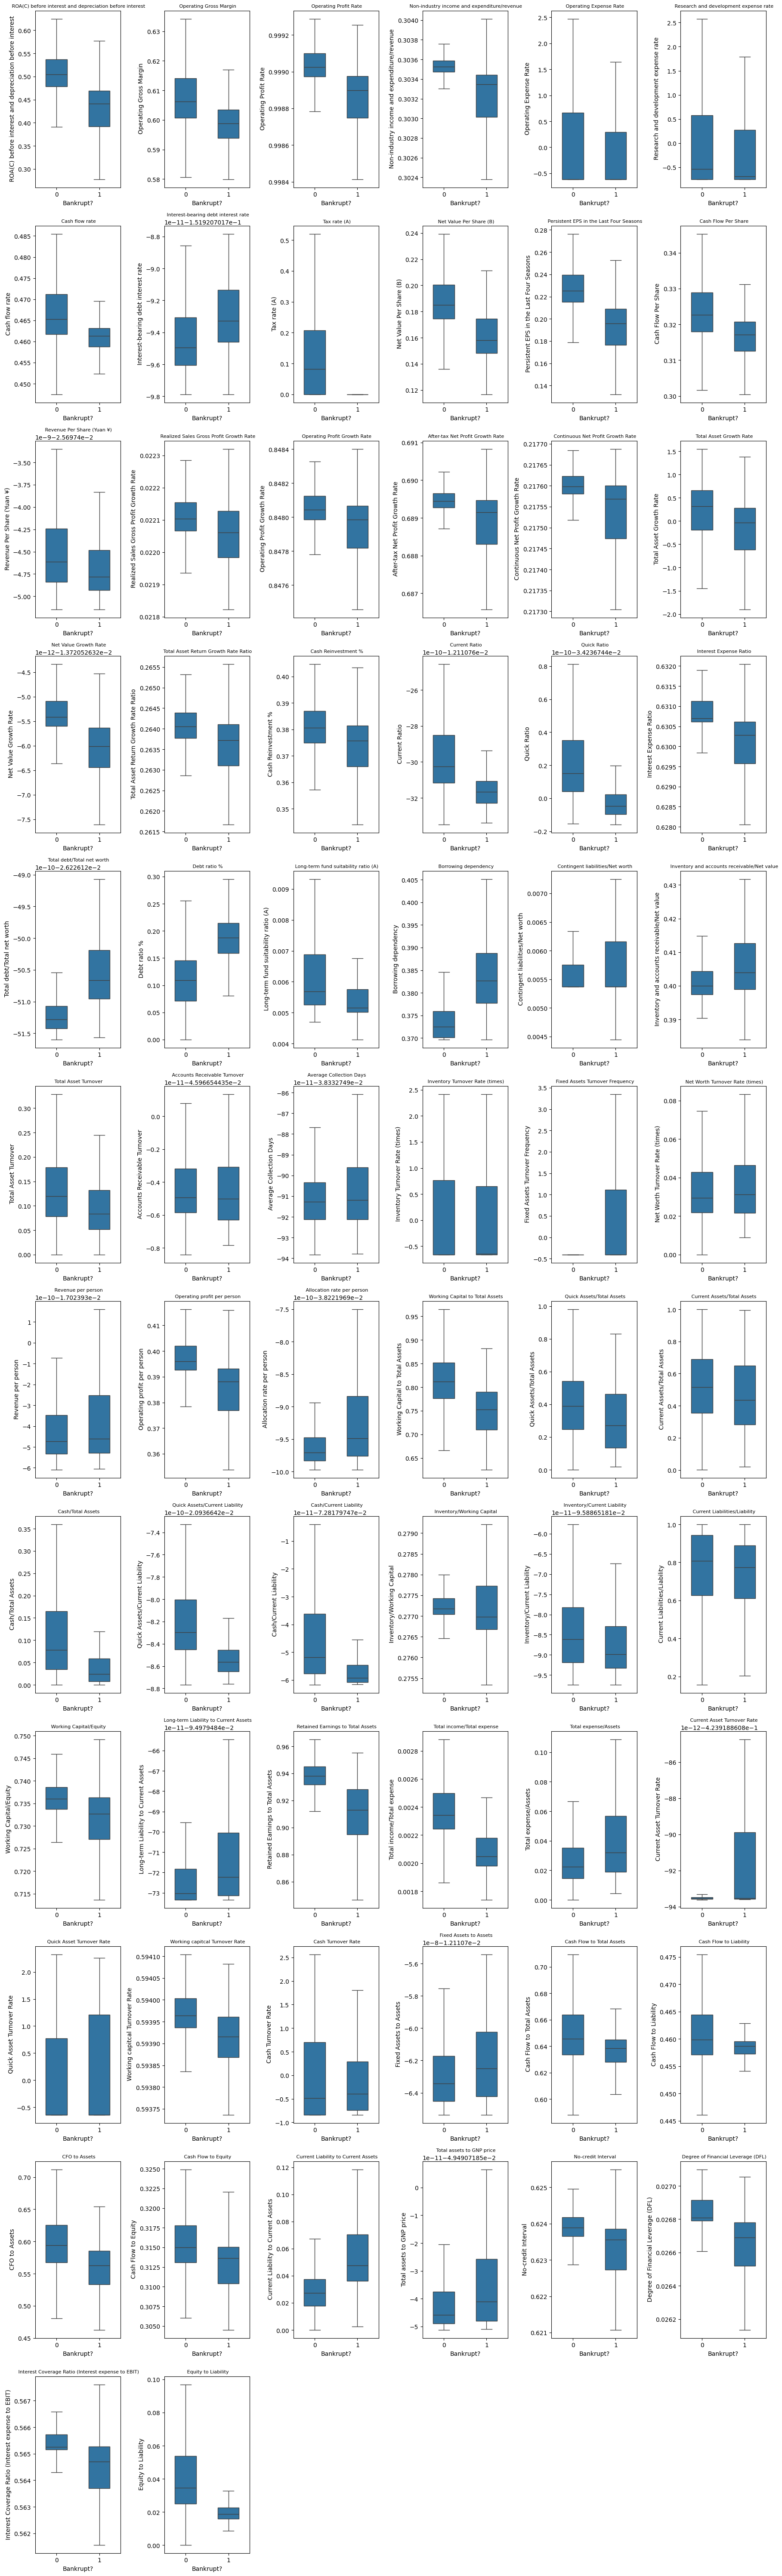

In [ ]:
# Visualize relationships between numerical features and target using box plots

# Get the list of numeric features that are still in df_cleaned
numeric_features_to_plot = [col for col in df_cleaned.columns if col in numeric_features and col != 'Bankrupt?']

# Calculate the number of rows and columns for the subplots
num_plots = len(numeric_features_to_plot)
num_cols = 6  # You might need to adjust this based on the number of features
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a single figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))  # Adjust figsize if needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through features and create box plots on subplots
for i, feature in enumerate(numeric_features_to_plot):
    ax = axes[i]  # Get the current subplot
    sns.boxplot(x='Bankrupt?', y=feature, data=df_cleaned, ax=ax, showfliers=False, width=0.5)  # showfliers=False to hide outliers
    ax.set_title(f'{feature}', fontsize=8)  # Just the feature name for title

# Hide any unused subplots
for j in range(num_plots, num_rows * num_cols):
    axes[j].set_visible(False)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
df_copy = df_cleaned.copy()

In [ ]:
!pip install scikit-learn==1.3.2
!pip install -U imbalanced-learn
!pip install -U mlxtend

In [ ]:
# Apply SMOTE to address class imbalance in the training set.
# This generates synthetic samples for the minority class (Bankrupt) to balance the class distribution and improve model performance.
# SMOTE is applied only to the training data to prevent data leakage and ensure a fair evaluation on the unseen test data.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# **Model Training and Evaluation**

# First Approach : Machine Learning Models without PCA

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

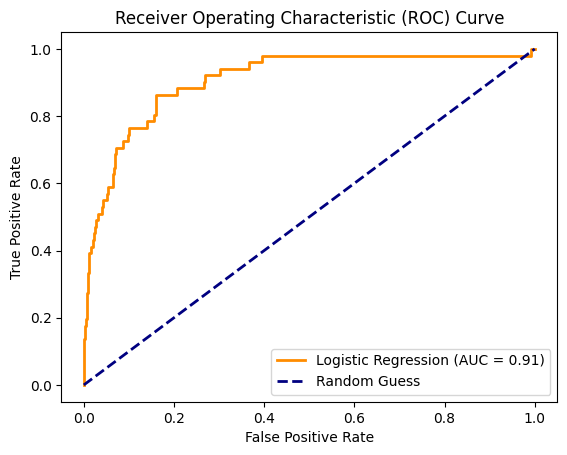

Logistic Regression:
  Accuracy: 0.8680
  Precision: 0.1884
  Recall: 0.7647
  F1-Score: 0.3023
  AUC-ROC: 0.9080
------------------------------


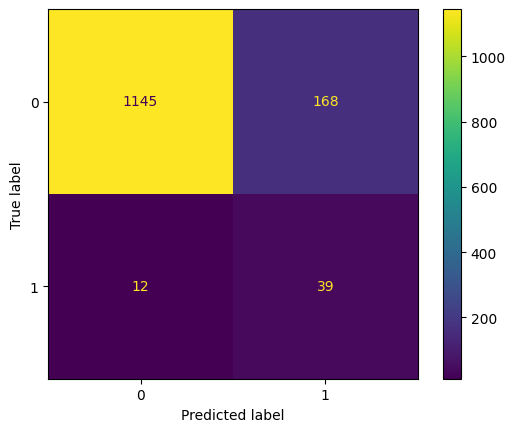


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1313
           1       0.19      0.76      0.30        51

    accuracy                           0.87      1364
   macro avg       0.59      0.82      0.61      1364
weighted avg       0.96      0.87      0.90      1364



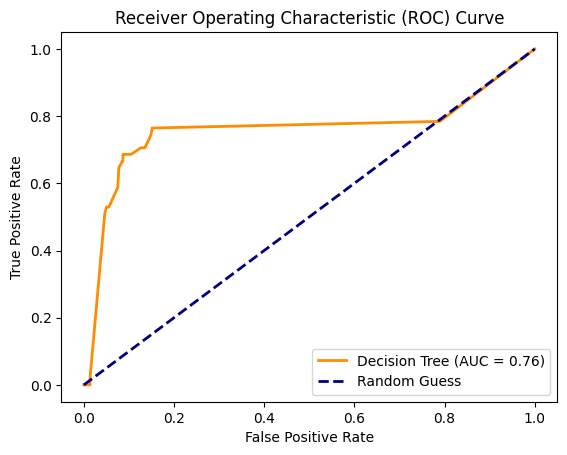

Decision Tree:
  Accuracy: 0.9047
  Precision: 0.2349
  Recall: 0.6863
  F1-Score: 0.3500
  AUC-ROC: 0.7593
------------------------------


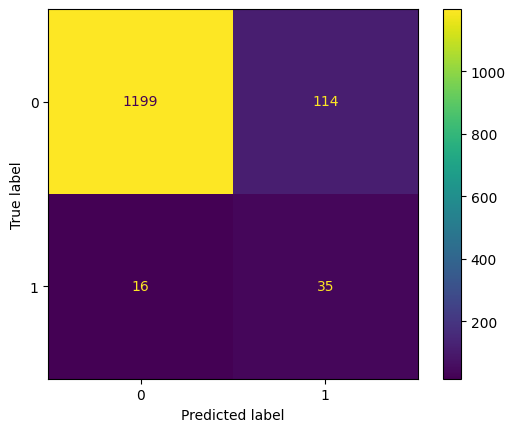


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1313
           1       0.23      0.69      0.35        51

    accuracy                           0.90      1364
   macro avg       0.61      0.80      0.65      1364
weighted avg       0.96      0.90      0.93      1364

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.868035   0.188406  0.764706  0.302326  0.907964
1        Decision Tree  0.904692   0.234899  0.686275  0.350000  0.759270


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Baseline Models
results = []

# Define base models and their hyperparameters
base_models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "param_grid": {"C": [0.1, 1, 10], "penalty": ['l1', 'l2']}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "param_grid": {"max_depth": [3, 5, 7], "min_samples_split": [2, 5, 10]}
    }
}

# Stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through base models
for model_name, model_data in base_models.items():
    model = model_data["model"]
    param_grid = model_data["param_grid"]

    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1')
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Best model
    best_model = grid_search.best_estimator_

    # Predictions on the test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

    # Calculate ROC curve data
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate evaluation metrics and compare with baseline
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    area_under_cruve = roc_auc_score(y_test, y_pred_proba)  # Corrected here to use y_pred_proba

    # Print the results
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {area_under_cruve:.4f}")
    print("-" * 30)

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    display_labels = [0, 1]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot()
    plt.show()

    # Generate and print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Append results
    results.append([model_name, accuracy, precision, recall, f1, area_under_cruve])

# Create a Pandas DataFrame from the results list
simple_model_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

# Display the DataFrame as a table
print(simple_model_results)


In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn -U  # Upgrade scikit-learn to the latest version
!pip install -U imbalanced-learn
!pip install -U mlxtend
!pip install xgboost==1.7.6 lightgbm==3.3.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


Training model Random Forest...


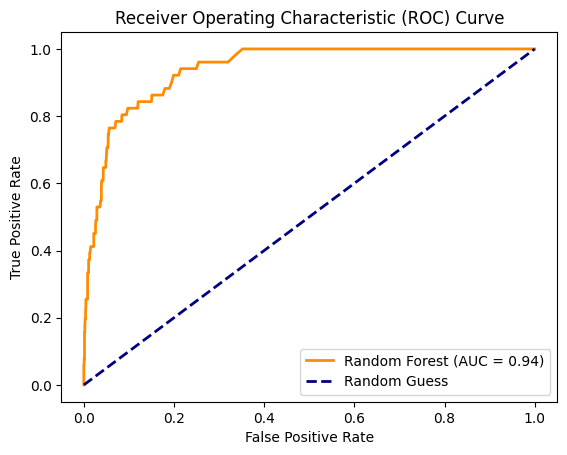

Model: Random Forest
  Accuracy: 0.9457
  Precision: 0.3544
  Recall: 0.5490
  F1-Score: 0.4308
  AUC-ROC: 0.9405
------------------------------


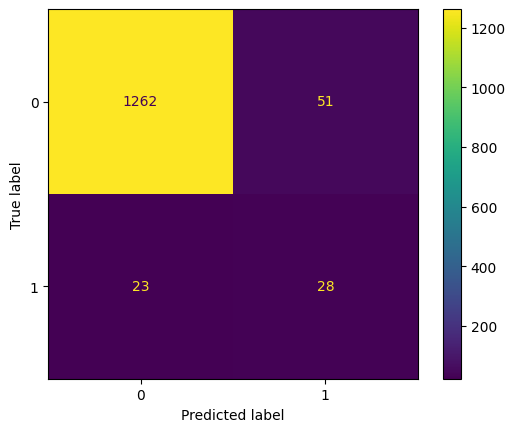


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1313
           1       0.35      0.55      0.43        51

    accuracy                           0.95      1364
   macro avg       0.67      0.76      0.70      1364
weighted avg       0.96      0.95      0.95      1364

Training model XGBoost...


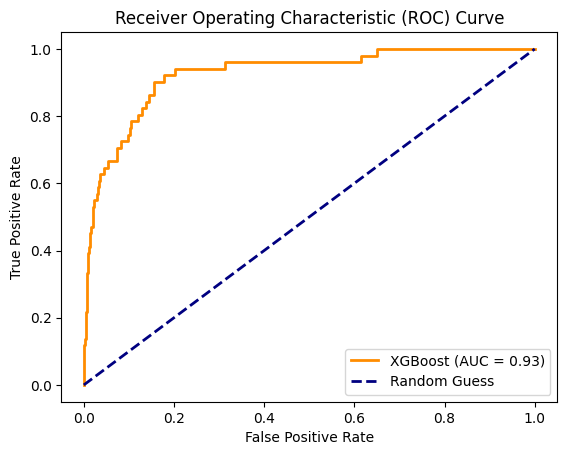

Model: XGBoost
  Accuracy: 0.9619
  Precision: 0.4909
  Recall: 0.5294
  F1-Score: 0.5094
  AUC-ROC: 0.9256
------------------------------


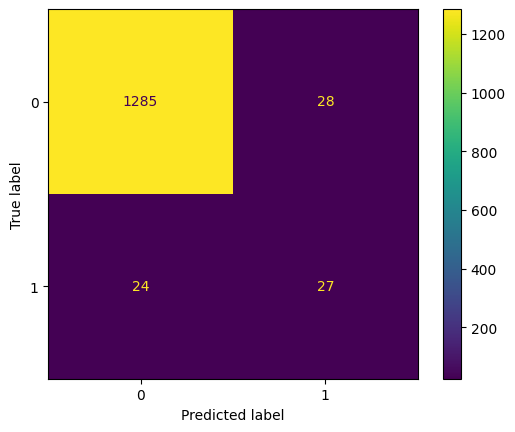


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.49      0.53      0.51        51

    accuracy                           0.96      1364
   macro avg       0.74      0.75      0.74      1364
weighted avg       0.96      0.96      0.96      1364

Training model LightGBM...


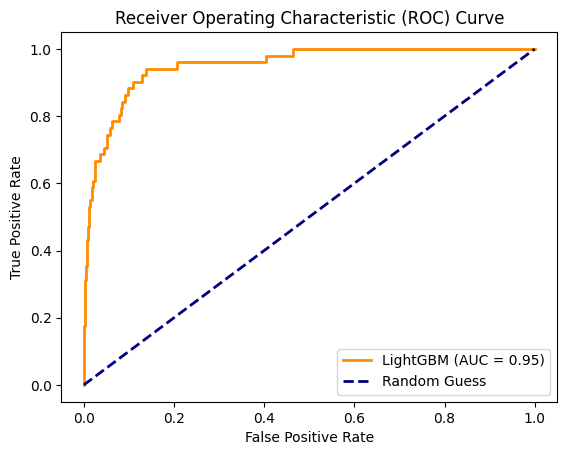

Model: LightGBM
  Accuracy: 0.9685
  Precision: 0.5870
  Recall: 0.5294
  F1-Score: 0.5567
  AUC-ROC: 0.9521
------------------------------


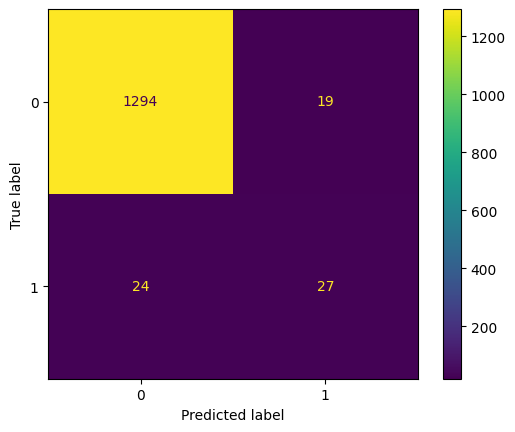


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1313
           1       0.59      0.53      0.56        51

    accuracy                           0.97      1364
   macro avg       0.78      0.76      0.77      1364
weighted avg       0.97      0.97      0.97      1364

           Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Random Forest  0.945748   0.354430  0.549020  0.430769  0.940475
1        XGBoost  0.961877   0.490909  0.529412  0.509434  0.925631
2       LightGBM  0.968475   0.586957  0.529412  0.556701  0.952108


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Advanced Models

# Initialize the results list before any model training
results = []

# Define models and hyperparameters
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, n_jobs=1),  # Set n_jobs=1 here
        "param_grid": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Loop through models
for model_name, model_data in models.items():
    print(f"Training model {model_name}...")
    model = model_data["model"]
    param_grid = model_data["param_grid"]

    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='f1',
                               cv=5, n_jobs=None)  # Change n_jobs to None

    grid_search.fit(X_train_resampled, y_train_resampled)

    # Best model
    best_model = grid_search.best_estimator_

    # Predictions on the test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

    # Calculate ROC curve data
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    area_under_cruve = roc_auc_score(y_test, y_pred_proba)

    # Print the results
    print(f"Model: {model_name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {area_under_cruve:.4f}")  # Print AUC-ROC
    print("-" * 30)

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    display_labels = [0, 1]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot()
    plt.show()

    # Generate and print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Store results in a list
    results.append([model_name, accuracy, precision, recall, f1, area_under_cruve])

# Create a Pandas DataFrame from the results list
ensemble_model_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

# Display the DataFrame as a table
print(ensemble_model_results)

# Second Approach : Machine Learning Models with PCA

In [ ]:
from sklearn.decomposition import PCA
# Select numeric features for PCA
numerical_features = X_train.select_dtypes(include=['float64']).columns
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

# Apply PCA before SMOTE
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_numerical)
X_test_pca = pca.transform(X_test_numerical)

# Create new DataFrames with the reduced features
X_train_pca = pd.DataFrame(X_train_pca, index=X_train.index)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index)

# Oversampling with SMOTE after PCA (only on training data)
smote = SMOTE(random_state=42)
X_train_pca_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "iprint": iprint,
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "iprint": iprint,
/usr/local/l

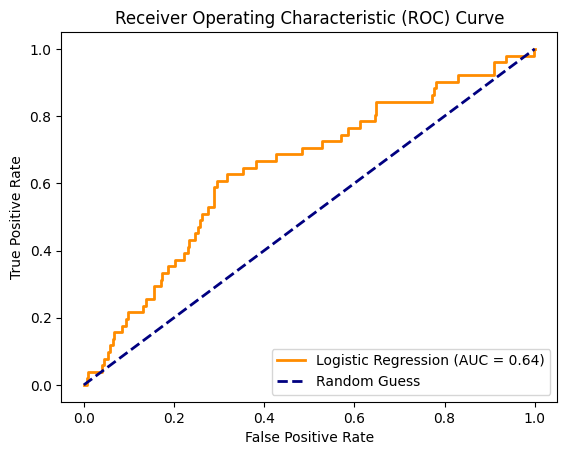

Logistic Regression:
  Accuracy: 0.6481
  Precision: 0.0649
  Recall: 0.6275
  F1-Score: 0.1176
  AUC-ROC: 0.6435
------------------------------


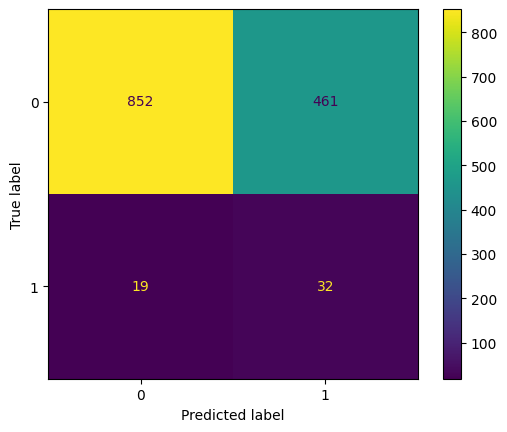


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      1313
           1       0.06      0.63      0.12        51

    accuracy                           0.65      1364
   macro avg       0.52      0.64      0.45      1364
weighted avg       0.94      0.65      0.76      1364



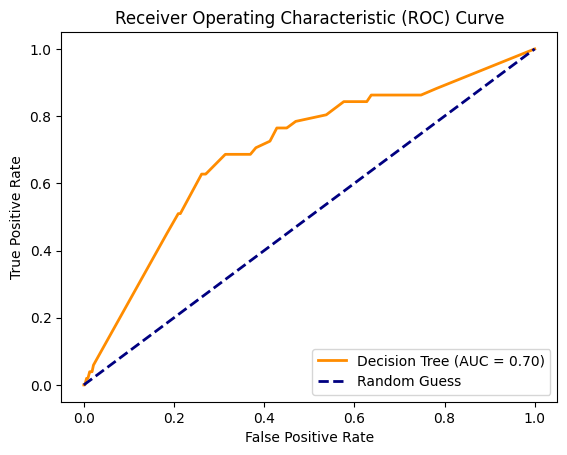

Decision Tree:
  Accuracy: 0.6606
  Precision: 0.0726
  Recall: 0.6863
  F1-Score: 0.1313
  AUC-ROC: 0.6977
------------------------------


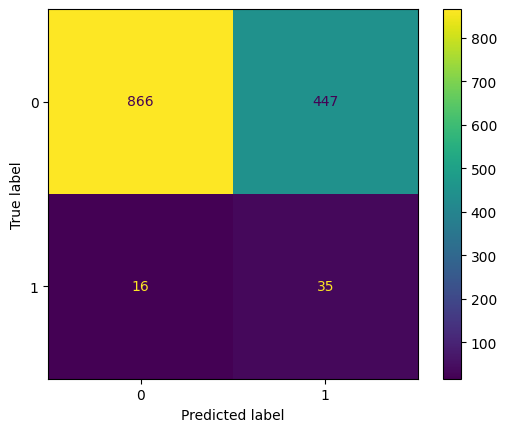


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1313
           1       0.07      0.69      0.13        51

    accuracy                           0.66      1364
   macro avg       0.53      0.67      0.46      1364
weighted avg       0.95      0.66      0.76      1364

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.648094   0.064909  0.627451  0.117647  0.643505
1        Decision Tree  0.660557   0.072614  0.686275  0.131332  0.697654


In [ ]:
# Bseline Models

# Initialize the results list before any model training
results = []

# Define the basic models and their hyperparameters
base_models = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "param_grid": {"C": [0.1, 1, 10], "penalty": ['l1', 'l2']}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "param_grid": {"max_depth": [3, 5, 7], "min_samples_split": [2, 5, 10]}
    }
}

# Stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop on basic models
for model_name, model_data in base_models.items():
    model = model_data["model"]
    param_grid = model_data["param_grid"]

    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1')
    grid_search.fit(X_train_pca_resampled, y_train_resampled)

    # Best model
    best_model = grid_search.best_estimator_


    # Predictions on the test set
    y_pred = best_model.predict(X_test_pca)
    y_pred_proba = best_model.predict_proba(X_test_pca)[:, 1]  # Get probabilities for class 1

    # Calculate ROC curve data
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

     # Calculate evaluation metrics and compare with baseline
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    area_under_cruve = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

     # Print the results
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {area_under_cruve:.4f}")
    print("-" * 30)

    # Generate and print the confusion matrix  # <-- Indenté ici
    cm = confusion_matrix(y_test, y_pred)
    # Assuming your target variable has labels 0 and 1
    display_labels = [0, 1]
    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot()
    plt.show()

    # Generate and print the classification report  # <-- Indenté ici
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ... (Calculate evaluation metrics) ...
    results.append([model_name, accuracy, precision, recall, f1, area_under_cruve])


# Create a Pandas DataFrame from the results list
pca_simple_model = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

# Display the DataFrame as a table
print(pca_simple_model)

Training model Random Forest...


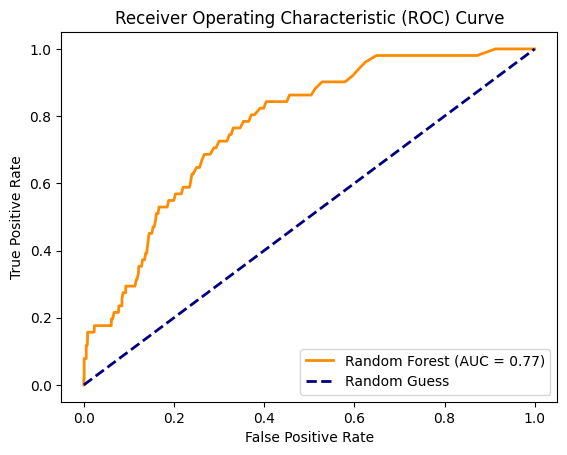

Random Forest:
  Accuracy: 0.9142
  Precision: 0.1071
  Recall: 0.1765
  F1-Score: 0.1333
  AUC-ROC: 0.7724
------------------------------


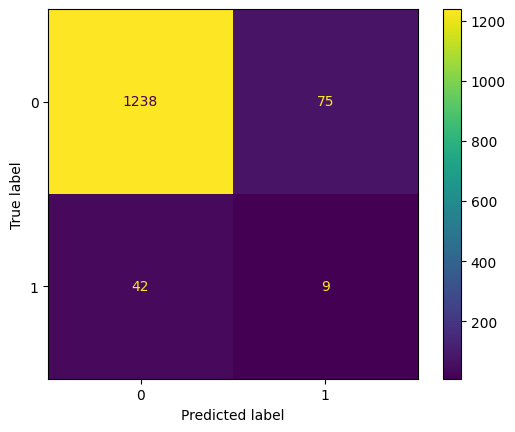


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1313
           1       0.11      0.18      0.13        51

    accuracy                           0.91      1364
   macro avg       0.54      0.56      0.54      1364
weighted avg       0.94      0.91      0.92      1364

Training model XGBoost...


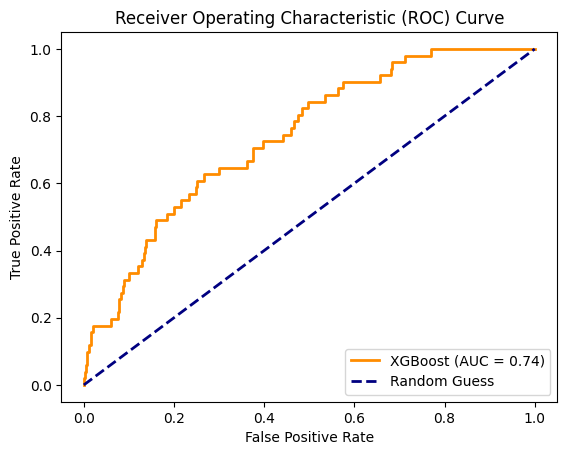

XGBoost:
  Accuracy: 0.9040
  Precision: 0.1000
  Recall: 0.1961
  F1-Score: 0.1325
  AUC-ROC: 0.7397
------------------------------


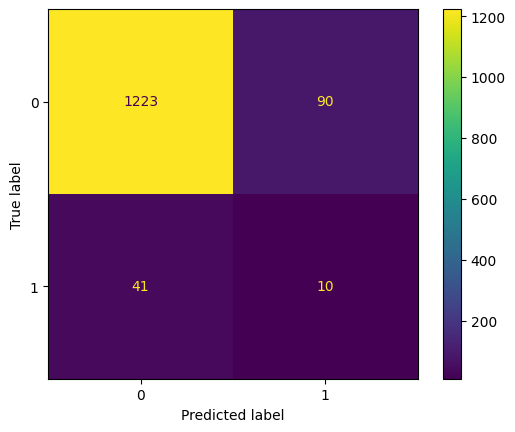


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1313
           1       0.10      0.20      0.13        51

    accuracy                           0.90      1364
   macro avg       0.53      0.56      0.54      1364
weighted avg       0.94      0.90      0.92      1364

Training model LightGBM...


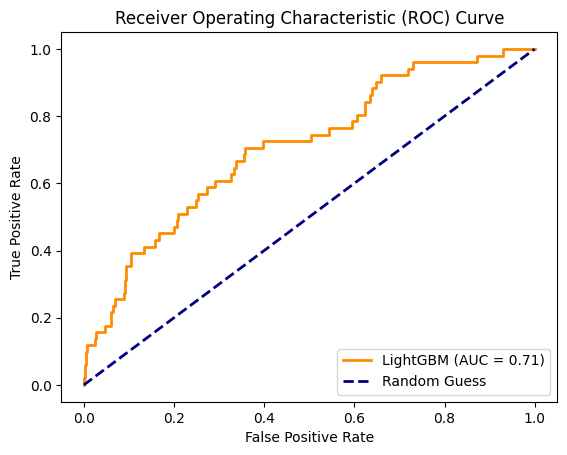

LightGBM:
  Accuracy: 0.9128
  Precision: 0.1047
  Recall: 0.1765
  F1-Score: 0.1314
  AUC-ROC: 0.7090
------------------------------


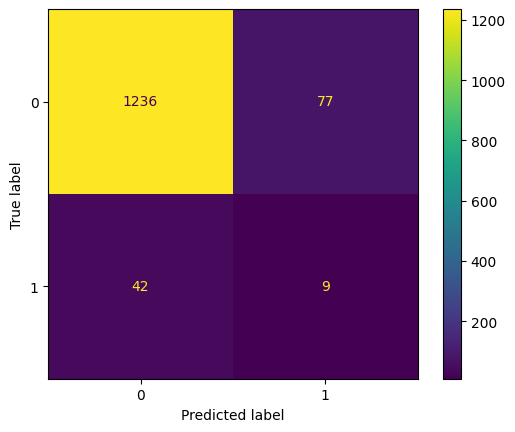


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1313
           1       0.10      0.18      0.13        51

    accuracy                           0.91      1364
   macro avg       0.54      0.56      0.54      1364
weighted avg       0.93      0.91      0.92      1364

           Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Random Forest  0.914223   0.107143  0.176471  0.133333  0.772367
1        XGBoost  0.903959   0.100000  0.196078  0.132450  0.739737
2       LightGBM  0.912757   0.104651  0.176471  0.131387  0.708959


In [ ]:
# Advanced Models

# Initialize the results list before any model training
results = []

# Define models and hyperparameters
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, n_jobs=1),  # Set n_jobs=1 here
        "param_grid": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },

    "XGBoost": {
        "model": XGBClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Loop through models
for model_name, model_data in models.items():
    print(f"Training model {model_name}...")
    model = model_data["model"]
    param_grid = model_data["param_grid"]

    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='f1',
                               cv=5, n_jobs=None)  # Change n_jobs to None

    grid_search.fit(X_train_pca_resampled, y_train_resampled)

    # Best model
    best_model = grid_search.best_estimator_

    # Predictions on the test set

    y_pred = best_model.predict(X_test_pca)
    y_pred_proba = best_model.predict_proba(X_test_pca)[:, 1]  # Get probabilities for class 1

    # Calculate ROC curve data
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Calculate evaluation metrics and compare with baseline
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    area_under_cruve = roc_auc_score(y_test, y_pred_proba)

     # Print the results
    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {area_under_cruve:.4f}")
    print("-" * 30)

    # Generate and print the confusion matrix  # <-- Indenté ici
    cm = confusion_matrix(y_test, y_pred)
    # Assuming your target variable has labels 0 and 1
    display_labels = [0, 1]
    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot()
    plt.show()

    # Generate and print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ... (Calculate evaluation metrics) ...
    results.append([model_name, accuracy, precision, recall, f1, area_under_cruve])


# Create a Pandas DataFrame from the results list
pca_advanced_model_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

# Display the DataFrame as a table
print(pca_advanced_model_results)

# Third Approach : Neural Networks for Bankruptcy Prediction

In [ ]:
!pip install shap

Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


331/331 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6542 - auc_2: 0.7190 - loss: 0.6126
Epoch 2/8
331/331 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8638 - auc_2: 0.9318 - loss: 0.3462
Epoch 3/8
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8920 - auc_2: 0.9546 - loss: 0.2715
Epoch 4/8
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9095 - auc_2: 0.9655 - loss: 0.2323
Epoch 5/8
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9172 - auc_2: 0.9698 - loss: 0.2151
Epoch 6/8
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9198 - auc_2: 0.9704 - loss: 0.2082
Epoch 7/8
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9274 - auc_2: 0.9740 - loss: 0.1932
Epoch 8/8
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9353 - auc_2: 0.9773 - loss: 0.1775
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network (without PCA):
  Accuracy: 0.8930
  Precision: 0.2254
  Recall: 0.7647
  F1-score: 0.3482
  AUC-ROC: 0.8950


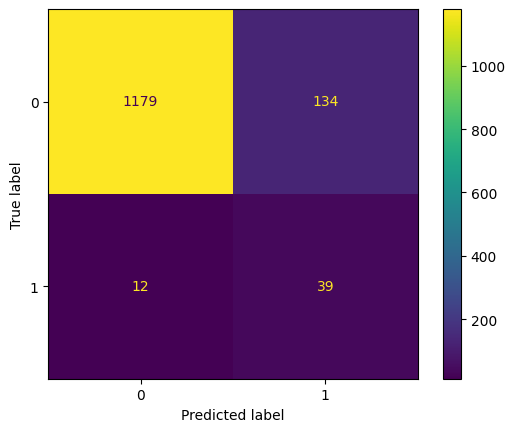


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1313
           1       0.23      0.76      0.35        51

    accuracy                           0.89      1364
   macro avg       0.61      0.83      0.64      1364
weighted avg       0.96      0.89      0.92      1364



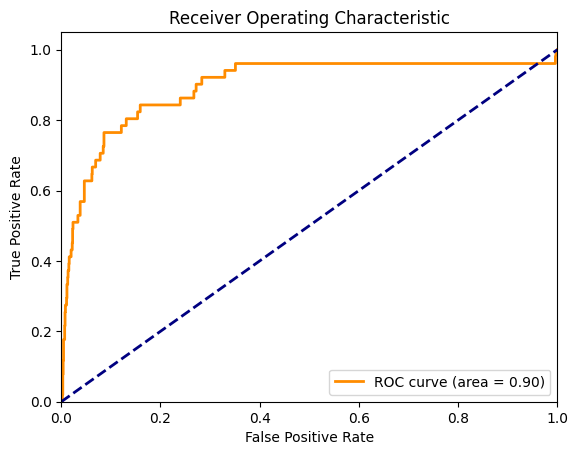

PermutationExplainer explainer: 1365it [02:48,  7.59it/s]


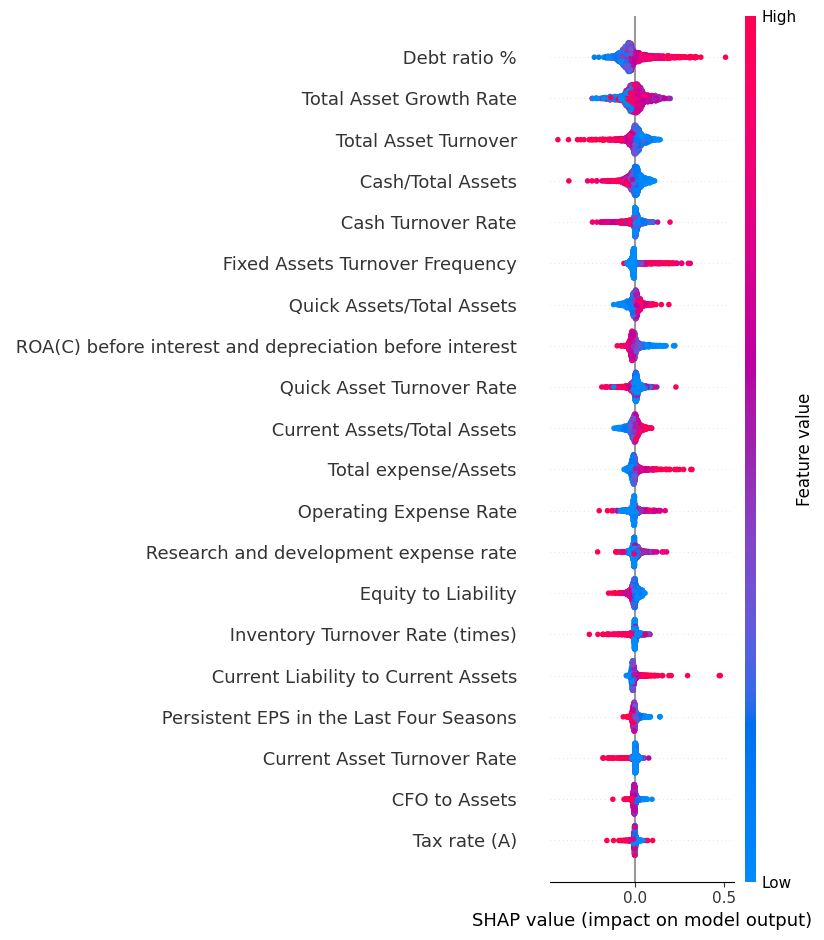

            Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Neural Network  0.892962   0.225434  0.764706  0.348214  0.895039


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import shap

# Initialize the results list before any model training
results = []

# 1. Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# 3. Train the model on the original data (without PCA)
model.fit(X_train_resampled, y_train_resampled, epochs=8, batch_size=32)

# 4. Evaluate the model on the original test data (without PCA)
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# 5. Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# 6. Display results
print("Neural Network (without PCA):")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")
print(f"  AUC-ROC: {auc_roc:.4f}")

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
display_labels = [0, 1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()
plt.show()

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# *** ROC Curve Plotting ***
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Create a masker for your data
masker = shap.maskers.Independent(X_test)  # Or use another appropriate masker

# Initialize the explainer with the masker
explainer = shap.Explainer(model, masker=masker)
shap_values = explainer.shap_values(X_test)

# Check if shap_values is a list (for multi-output models)
if isinstance(shap_values, list):
    # If it's a list, select the shap values for the desired class (e.g., class 1)
    shap_values_class1 = shap_values[1]  # Assuming you want to plot for class 1
    shap.summary_plot(shap_values_class1, X_test)
else:
    # If it's not a list, it's likely for a single-output model, plot directly
    shap.summary_plot(shap_values, X_test)


# Store and display results
results.append(['Neural Network', accuracy, precision, recall, f1, auc_roc])
neural_network_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])
print(neural_network_results)